In [1]:
import pandas as pd
import numpy as np
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_dir = os.path.join(project_root, 'data', 'cleaned')
final_df_path = os.path.join(data_dir, 'final_df.csv')
pd.set_option('display.max_columns', None)
df = pd.read_csv(final_df_path)

In [2]:
df

,ROUTE,CARRIER,ROUTE_NAME_CITY,ONE_WAY_DISTANCE_MILES,AVG_OCCUPANCY_RATE,AVG_DEP_DELAY_MINUTES,AVG_ARR_DELAY_MINUTES,TOTAL_FLIGHTS,CARRIER_FROM_TICKETS,TOTAL_PASSENGERS,AVG_ROUNDTRIP_FARE_PER_PASSENGER,AIRPORT_CODE_A,AIRPORT_CODE_B,AIRPORT_A_SIZE,AIRPORT_A_NAME,AIRPORT_A_ELEVATION_FT,AIRPORT_A_CITY,AIRPORT_A_COORDINATES,AIRPORT_B_SIZE,AIRPORT_B_NAME,AIRPORT_B_ELEVATION_FT,AIRPORT_B_CITY,AIRPORT_B_COORDINATES,ESTIMATED_PASSENGERS,TICKET_REVENUE,BAGGAGE_REVENUE,TOTAL_REVENUE,ROUND_TRIP_DISTANCE_MILES,MILEAGE_COST,AIRPORT_FEES,DELAY_COST,TOTAL_COST,PROFIT
0,ABE-ATL,9E,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.652621,0.515817,-1.425862,263,9E,44.0,587.522727,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",34327.842297,20168387.53,1201474.48,21369862.01,1384.0,3341446.56,3945000,0.0,7286446.56,14083415.45
1,ABE-ATL,DL,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.656911,-1.871067,-7.512380,171,DL,29.0,470.758621,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",22466.358960,10576232.16,786322.56,11362554.72,1384.0,2172575.52,2565000,0.0,4737575.52,6624979.20
2,ABE-CLT,OH,"Allentown/Bethlehem/Easton, PA -> Charlotte, NC",481.0,0.661096,-1.507968,-2.513944,502,OH,32.0,494.062500,ABE,CLT,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Charlotte Douglas International Airport,748.0,Charlotte,"-80.94309997558594, 35.2140007019043",66374.000000,32792904.38,2323090.00,35115994.38,962.0,4433242.32,7530000,0.0,11963242.32,23152752.06
3,ABE-DTW,OO,"Allentown/Bethlehem/Easton, PA -> Detroit, MI",425.0,0.645200,-0.166188,-5.120053,495,OO,21.0,385.809524,ABE,DTW,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Detroit Metropolitan Wayne County Airport,645.0,Detroit,"-83.35340118408203, 42.212398529052734",63874.781899,24643499.19,2235617.37,26879116.55,850.0,3862485.00,7425000,0.0,11287485.00,15591631.55
4,ABE-FLL,G4,"Allentown/Bethlehem/Easton, PA -> Fort Lauderd...",1041.0,0.605250,-0.500000,-1.175000,40,G4,38.0,158.263158,ABE,FLL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Fort Lauderdale Hollywood International Airport,30.0,Fort Lauderdale,"-80.152702, 26.072599",4842.000000,766310.21,169470.00,935780.21,2082.0,764510.40,600000,0.0,1364510.40,-428730.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,STL-TPA,WN,"St. Louis, MO -> Tampa, FL",869.0,0.658384,2.898325,0.100162,421,WN,192.0,404.515625,STL,TPA,large_airport,St Louis Lambert International Airport,618.0,St Louis,"-90.370003, 38.748697",large_airport,Tampa International Airport,30.0,Tampa,"-82.533203125, 27.975500106811523",55435.955087,22424710.02,1940258.43,24364968.45,1738.0,6716987.64,8420000,0.0,15136987.64,9227980.81
5490,STL-TUL,WN,"St. Louis, MO -> Tulsa, OK",351.0,0.646288,1.410532,-2.346538,325,WN,36.0,364.055556,STL,TUL,large_airport,St Louis Lambert International Airport,618.0,St Louis,"-90.370003, 38.748697",large_airport,Tulsa International Airport,677.0,Tulsa,"-95.88809967041016, 36.19839859008789",42008.730023,15293511.55,1470305.55,16763817.10,702.0,2094417.00,6500000,0.0,8594417.00,8169400.10
5491,SYR-TPA,F9,"Syracuse, NY -> Tampa, FL",1104.0,0.615556,1.347222,-5.263889,72,F9,20.0,134.850000,SYR,TPA,large_airport,Syracuse Hancock International Airport,421.0,Syracuse,"-76.1063003540039, 43.11119842529297",large_airport,Tampa International Airport,30.0,Tampa,"-82.533203125, 27.975500106811523",8864.000000,1195310.40,310240

In [3]:
df.columns

Index(['ROUTE', 'CARRIER', 'ROUTE_NAME_CITY', 'ONE_WAY_DISTANCE_MILES',
       'AVG_OCCUPANCY_RATE', 'AVG_DEP_DELAY_MINUTES', 'AVG_ARR_DELAY_MINUTES',
       'TOTAL_FLIGHTS', 'CARRIER_FROM_TICKETS', 'TOTAL_PASSENGERS',
       'AVG_ROUNDTRIP_FARE_PER_PASSENGER', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B',
       'AIRPORT_A_SIZE', 'AIRPORT_A_NAME', 'AIRPORT_A_ELEVATION_FT',
       'AIRPORT_A_CITY', 'AIRPORT_A_COORDINATES', 'AIRPORT_B_SIZE',
       'AIRPORT_B_NAME', 'AIRPORT_B_ELEVATION_FT', 'AIRPORT_B_CITY',
       'AIRPORT_B_COORDINATES', 'ESTIMATED_PASSENGERS', 'TICKET_REVENUE',
       'BAGGAGE_REVENUE', 'TOTAL_REVENUE', 'ROUND_TRIP_DISTANCE_MILES',
       'MILEAGE_COST', 'AIRPORT_FEES', 'DELAY_COST', 'TOTAL_COST', 'PROFIT'],
      dtype='object')

In [4]:
# Basic Descriptive Statistics
numeric_cols = [
    'ONE_WAY_DISTANCE_MILES', 'AVG_OCCUPANCY_RATE', 'AVG_DEP_DELAY_MINUTES',
    'AVG_ARR_DELAY_MINUTES', 'TOTAL_FLIGHTS', 'TOTAL_PASSENGERS',
    'AVG_ROUNDTRIP_FARE_PER_PASSENGER', 'TICKET_REVENUE', 'BAGGAGE_REVENUE',
    'TOTAL_REVENUE', 'ROUND_TRIP_DISTANCE_MILES', 'MILEAGE_COST',
    'AIRPORT_FEES', 'DELAY_COST', 'TOTAL_COST', 'PROFIT', 'ESTIMATED_PASSENGERS'
]

# Summary statistics
# Neatly formatted descriptive statistics with styling
stats_df = df[numeric_cols].describe().T

# Apply formatting
stats_df.style.format("{:,.2f}").set_caption("Descriptive Statistics of Key Metrics").background_gradient(cmap='Blues')



,count,mean,std,min,25%,50%,75%,max
ONE_WAY_DISTANCE_MILES,"5,494.00",807.62,433.84,31.00,444.00,748.00,"1,107.00","1,554.00"
AVG_OCCUPANCY_RATE,"5,494.00",0.65,0.04,0.30,0.64,0.65,0.66,0.98
AVG_DEP_DELAY_MINUTES,"5,494.00",-0.28,2.69,-15.00,-1.85,-0.34,1.30,13.00
AVG_ARR_DELAY_MINUTES,"5,494.00",-3.24,5.55,-38.00,-6.22,-3.10,-0.26,27.00
TOTAL_FLIGHTS,"5,494.00",321.33,366.54,1.00,80.00,180.00,418.75,"4,794.00"
TOTAL_PASSENGERS,"5,494.00",70.29,74.61,1.00,19.00,46.00,97.00,898.00
AVG_ROUNDTRIP_FARE_PER_PASSENGER,"5,494.00",393.63,143.19,0.00,307.07,403.87,493.21,871.00
TICKET_REVENUE,"5,494.00","17,374,903.07","21,350,249.94",0.00,"2,934,082.74","10,404,179.96","23,163,637.23","200,018,028.70"
BAGGAGE_REVENUE,"5,494.00","1,462,559.83","1,667,206.28","2,100.00","363,807.50","833,659.52","1,912,684.68","21,733,232.95"
TOTAL_REVENUE,"5,494.00","18,837,462.90","22,932,554.71","3,496.00","3,385,601.98","11,303,660.65","24,974,596.46","215,237,982.87"


In [5]:
# Filter for medium-large route pairs only
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()

In [6]:
filtered_df

,ROUTE,CARRIER,ROUTE_NAME_CITY,ONE_WAY_DISTANCE_MILES,AVG_OCCUPANCY_RATE,AVG_DEP_DELAY_MINUTES,AVG_ARR_DELAY_MINUTES,TOTAL_FLIGHTS,CARRIER_FROM_TICKETS,TOTAL_PASSENGERS,AVG_ROUNDTRIP_FARE_PER_PASSENGER,AIRPORT_CODE_A,AIRPORT_CODE_B,AIRPORT_A_SIZE,AIRPORT_A_NAME,AIRPORT_A_ELEVATION_FT,AIRPORT_A_CITY,AIRPORT_A_COORDINATES,AIRPORT_B_SIZE,AIRPORT_B_NAME,AIRPORT_B_ELEVATION_FT,AIRPORT_B_CITY,AIRPORT_B_COORDINATES,ESTIMATED_PASSENGERS,TICKET_REVENUE,BAGGAGE_REVENUE,TOTAL_REVENUE,ROUND_TRIP_DISTANCE_MILES,MILEAGE_COST,AIRPORT_FEES,DELAY_COST,TOTAL_COST,PROFIT
0,ABE-ATL,9E,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.652621,0.515817,-1.425862,263,9E,44.0,587.522727,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",34327.842297,20168387.53,1201474.48,21369862.01,1384.0,3341446.56,3945000,0.0,7286446.56,14083415.45
1,ABE-ATL,DL,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.656911,-1.871067,-7.512380,171,DL,29.0,470.758621,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",22466.358960,10576232.16,786322.56,11362554.72,1384.0,2172575.52,2565000,0.0,4737575.52,6624979.20
2,ABE-CLT,OH,"Allentown/Bethlehem/Easton, PA -> Charlotte, NC",481.0,0.661096,-1.507968,-2.513944,502,OH,32.0,494.062500,ABE,CLT,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Charlotte Douglas International Airport,748.0,Charlotte,"-80.94309997558594, 35.2140007019043",66374.000000,32792904.38,2323090.00,35115994.38,962.0,4433242.32,7530000,0.0,11963242.32,23152752.06
3,ABE-DTW,OO,"Allentown/Bethlehem/Easton, PA -> Detroit, MI",425.0,0.645200,-0.166188,-5.120053,495,OO,21.0,385.809524,ABE,DTW,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Detroit Metropolitan Wayne County Airport,645.0,Detroit,"-83.35340118408203, 42.212398529052734",63874.781899,24643499.19,2235617.37,26879116.55,850.0,3862485.00,7425000,0.0,11287485.00,15591631.55
4,ABE-FLL,G4,"Allentown/Bethlehem/Easton, PA -> Fort Lauderd...",1041.0,0.605250,-0.500000,-1.175000,40,G4,38.0,158.263158,ABE,FLL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Fort Lauderdale Hollywood International Airport,30.0,Fort Lauderdale,"-80.152702, 26.072599",4842.000000,766310.21,169470.00,935780.21,2082.0,764510.40,600000,0.0,1364510.40,-428730.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,SLC-SUN,OO,"Salt Lake City, UT -> Sun Valley/Hailey/Ketchu...",222.0,0.655193,-3.040770,-5.236843,466,OO,9.0,324.000000,SLC,SUN,large_airport,Salt Lake City International Airport,776.0,Salt Lake City,"-111.97799682617188, 40.78839874267578",medium_airport,Friedman Memorial Airport,776.0,Hailey,"-114.2959976, 43.50439835",61063.965354,19784724.77,2137238.79,21921963.56,444.0,1899378.72,6990000,0.0,8889378.72,13032584.84
5485,SLC-TWF,OO,"Salt Lake City, UT -> Twin Falls, ID",175.0,0.668678,-3.179545,-6.664776,582,OO,13.0,348.923077,SLC,TWF,large_airport,Salt Lake City International Airport,776.0,Salt Lake City,"-111.97799682617188, 40.78839874267578",medium_airport,Joslin Field Magic Valley Regional Airport,776.0,Twin Falls,"-114.487999, 42.4818",77834.077462,27158105.80,2724192.71,29882298.51,350.0,1869966.00,8730000,0.0,10599966.00,19282332.51
5488,SNA-STS,QX,"Santa Ana, CA -> Santa Rosa, CA",433.0,0.645899,0.882022,-2.380222,178,QX,49.0,310.244898,SNA,STS,large_airport,John Wayne Airport-Orange County Airport,56.0,Santa Ana,"-117.8679962, 33.67570114",medium_airport,Charles M. Schulz Sonoma County 

In [7]:
# Basic Descriptive Statistics
numeric_cols = [
    'ONE_WAY_DISTANCE_MILES', 'AVG_OCCUPANCY_RATE', 'AVG_DEP_DELAY_MINUTES',
    'AVG_ARR_DELAY_MINUTES', 'TOTAL_FLIGHTS', 'TOTAL_PASSENGERS',
    'AVG_ROUNDTRIP_FARE_PER_PASSENGER', 'TICKET_REVENUE', 'BAGGAGE_REVENUE',
    'TOTAL_REVENUE', 'ROUND_TRIP_DISTANCE_MILES', 'MILEAGE_COST',
    'AIRPORT_FEES', 'DELAY_COST', 'TOTAL_COST', 'PROFIT', 'ESTIMATED_PASSENGERS'
]

# Summary statistics
# Neatly formatted descriptive statistics with styling
stats_df = filtered_df[numeric_cols].describe().T

# Apply formatting
stats_df.style.format("{:,.2f}").set_caption("Descriptive Statistics of Key Metrics").background_gradient(cmap='Blues')



,count,mean,std,min,25%,50%,75%,max
ONE_WAY_DISTANCE_MILES,"1,127.00",711.01,423.55,68.00,377.00,612.00,996.00,"1,554.00"
AVG_OCCUPANCY_RATE,"1,127.00",0.65,0.03,0.32,0.64,0.65,0.66,0.97
AVG_DEP_DELAY_MINUTES,"1,127.00",-0.87,2.76,-10.04,-2.58,-0.86,0.65,13.00
AVG_ARR_DELAY_MINUTES,"1,127.00",-3.02,5.73,-24.00,-6.38,-3.04,0.24,27.00
TOTAL_FLIGHTS,"1,127.00",253.84,299.97,1.00,72.00,177.00,346.50,"4,794.00"
TOTAL_PASSENGERS,"1,127.00",39.72,37.66,1.00,13.00,30.00,53.00,252.00
AVG_ROUNDTRIP_FARE_PER_PASSENGER,"1,127.00",402.40,158.33,0.00,290.80,413.35,514.78,871.00
TICKET_REVENUE,"1,127.00","13,634,184.33","15,090,121.58",0.00,"2,692,683.35","9,590,742.12","18,939,650.26","170,920,504.13"
BAGGAGE_REVENUE,"1,127.00","1,155,101.38","1,364,345.46","2,240.00","323,875.23","793,795.45","1,580,145.00","21,733,232.95"
TOTAL_REVENUE,"1,127.00","14,789,285.71","16,347,250.13","31,780.00","3,095,881.37","10,543,950.32","20,477,751.25","192,653,737.08"


### Storyline

#### 1. Market Landscape Overview

#### 2. Route Profitability Analysis

#### 3. Delay & Punctuality Performance

#### 4. Final Route Recommendation

## 1. Market Landscape Overview

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/698881139.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ESTIMATED_PASSENGERS', y='ROUTE_NAME_CITY', data=top_routes, palette='Blues_d')


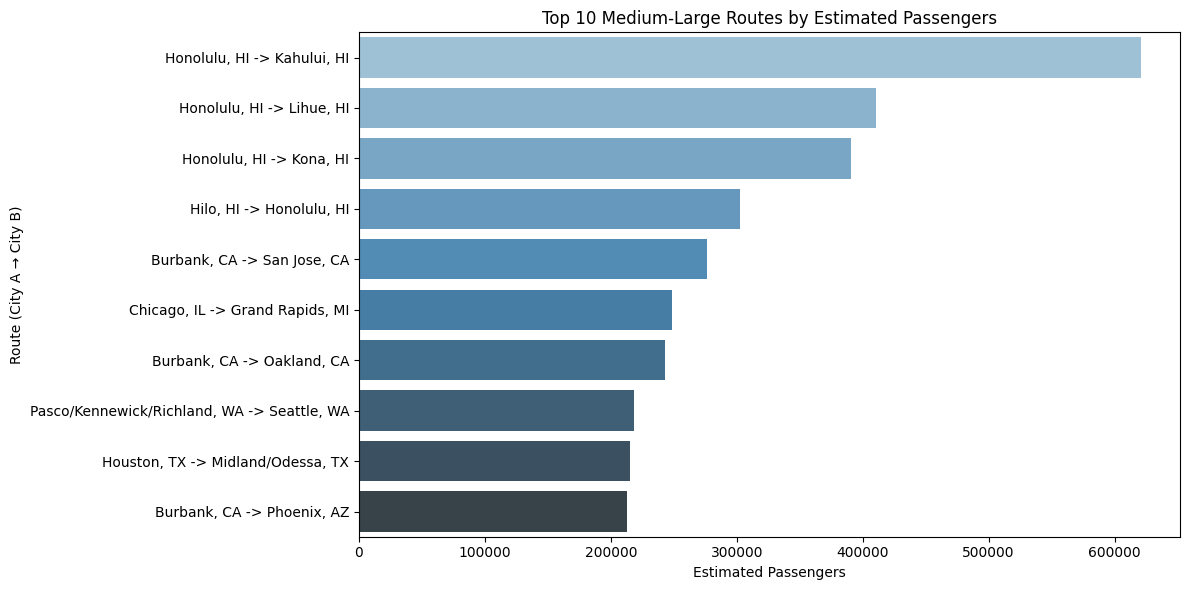

In [8]:
# Group by route name and sum estimated passengers
import matplotlib.pyplot as plt
import seaborn as sns

top_routes = (
    filtered_df
    .groupby('ROUTE_NAME_CITY')['ESTIMATED_PASSENGERS']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ESTIMATED_PASSENGERS', y='ROUTE_NAME_CITY', data=top_routes, palette='Blues_d')
plt.title('Top 10 Medium-Large Routes by Estimated Passengers')
plt.xlabel('Estimated Passengers')
plt.ylabel('Route (City A → City B)')
plt.tight_layout()
plt.show()

##### Insights:

1. Hawaii routes (Honolulu ↔ Kahului, Lihue, Kona, Hilo) continue to dominate, reflecting concentrated inter-island demand — a strong candidate for high-utilization, low-distance operations.

2. Burbank, CA shows up three times, making it an unexpected medium-airport hotspot with strong connections across California and the Southwest (San Jose, Oakland, Phoenix).

3. Chicago → Grand Rapids and Houston → Midland/Odessa highlight inland regional demand with consistent volume — ideal for route optimization without coastal congestion.

4. Pacific Northwest interest surfaces via Pasco → Seattle, suggesting opportunity in connecting secondary cities to larger hubs.

##### Storyline Placement:

Using this chart in the Market Landscape Overview to emphasize where passenger volumes concentrate within medium-large airport pairs, and to justify hub selection or route prioritization strategies.

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/2946342365.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PROFIT', y='ROUTE_NAME_CITY', data=top_profit_routes, palette='Greens_d')


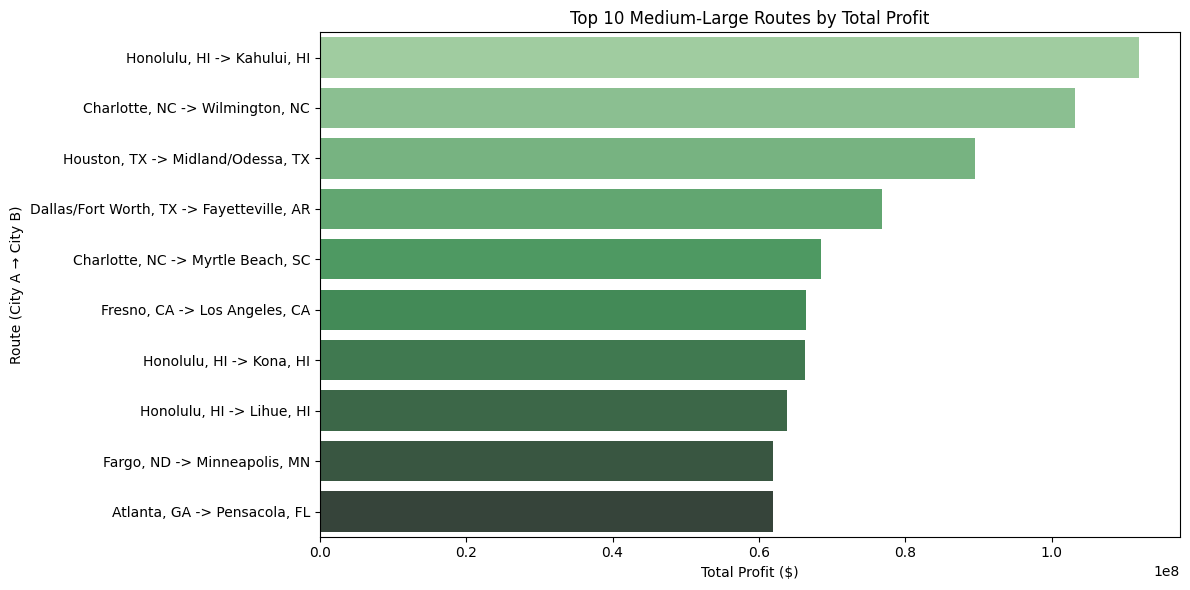

In [9]:
# Group by route name and sum profit
top_profit_routes = (
    filtered_df
    .groupby('ROUTE_NAME_CITY')['PROFIT']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='PROFIT', y='ROUTE_NAME_CITY', data=top_profit_routes, palette='Greens_d')
plt.title('Top 10 Medium-Large Routes by Total Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('Route (City A → City B)')
plt.tight_layout()
plt.show()


##### Insights:

1. Honolulu → Kahului remains the top earner, reinforcing the profitability of Hawaii’s short, high-frequency inter-island routes.

2. Charlotte → Wilmington & Myrtle Beach show consistent regional profitability — short-haul, medium-large city pairs with efficient turnaround potential.

3. Texas remains a hotspot, with Houston → Midland/Odessa and Dallas → Fayetteville both cracking the top 5 — strong margins from in-state, mid-range routes.

4. California emerges via Fresno → LAX, suggesting that even dense, intra-state routes can drive profit if cost structure is lean.

5. Midwest presence with Fargo → Minneapolis and Atlanta → Pensacola highlights stable profitability outside of typical high-traffic corridors.

##### Storyline Placement:
Including this in the Route Profitability Analysis will support the idea that regional and intra-state routes can deliver outsized profit — not just long-haul or coastal hubs. This will also advocate for a lean, short-route fleet strategy in key clusters.

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/966505722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AVG_TOTAL_DELAY_MINUTES', y='ROUTE_NAME_CITY', data=low_delay_routes, palette='coolwarm_r')


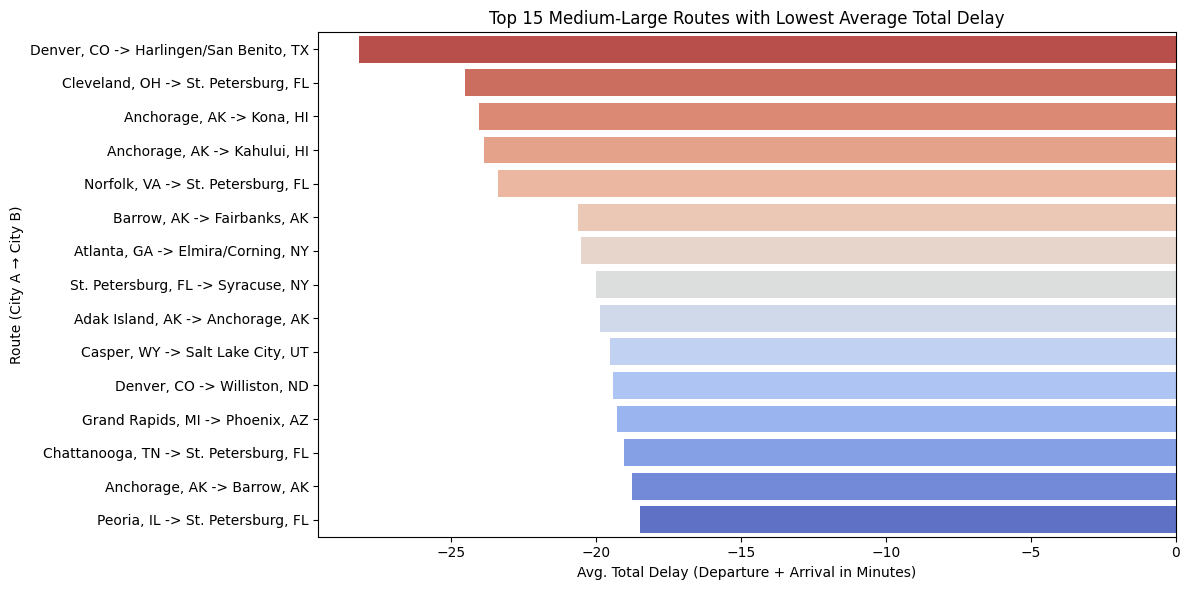

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the dataframe and calculate total delay
delay_df = filtered_df.copy()
delay_df['AVG_TOTAL_DELAY_MINUTES'] = delay_df['AVG_DEP_DELAY_MINUTES'] + delay_df['AVG_ARR_DELAY_MINUTES']

# Group by route and get average total delay
low_delay_routes = (
    delay_df
    .groupby('ROUTE_NAME_CITY')['AVG_TOTAL_DELAY_MINUTES']
    .mean()
    .sort_values()
    .head(15)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='AVG_TOTAL_DELAY_MINUTES', y='ROUTE_NAME_CITY', data=low_delay_routes, palette='coolwarm_r')
plt.title('Top 15 Medium-Large Routes with Lowest Average Total Delay')
plt.xlabel('Avg. Total Delay (Departure + Arrival in Minutes)')
plt.ylabel('Route (City A → City B)')
plt.tight_layout()
plt.show()


##### Insights:

1. Several routes show negative total delays, meaning flights are actually arriving earlier than scheduled on average. That's a huge win for punctuality.

2. Denver, CO → Harlingen, TX tops the list with the lowest average delay (~ -27 mins). A great brand-fit candidate for “On time, for you.”

3. Cleveland → St. Petersburg and Norfolk → St. Petersburg also rank high — St. Pete, FL appears multiple times as a reliably timed destination.

4. Alaska dominates this chart — Anchorage appears in multiple combinations (Kona, Kahului, Barrow, Adak Island).
This could be due to lower congestion or generous scheduling buffers — great for on-time stats but may come with operational complexity (weather, fuel costs).

5. Atlanta → Elmira, NY and Grand Rapids → Phoenix are solid mainland options with consistently low delays and better logistical feasibility.

##### Storyline Placement:

Using this chart in the Delay & Punctuality Performance section to support the brand's positioning.
“To honor the punctuality promise, analyzed average delays across all medium-large airport routes. Several routes (e.g., Denver → Harlingen, Cleveland → St. Pete) consistently arrive early, making them ideal candidates to maintain our brand’s operational reliability.”

# New column: delay_df['AVG_TOTAL_DELAY_MINUTES'] = delay_df['AVG_DEP_DELAY_MINUTES'] + delay_df['AVG_ARR_DELAY_MINUTES']

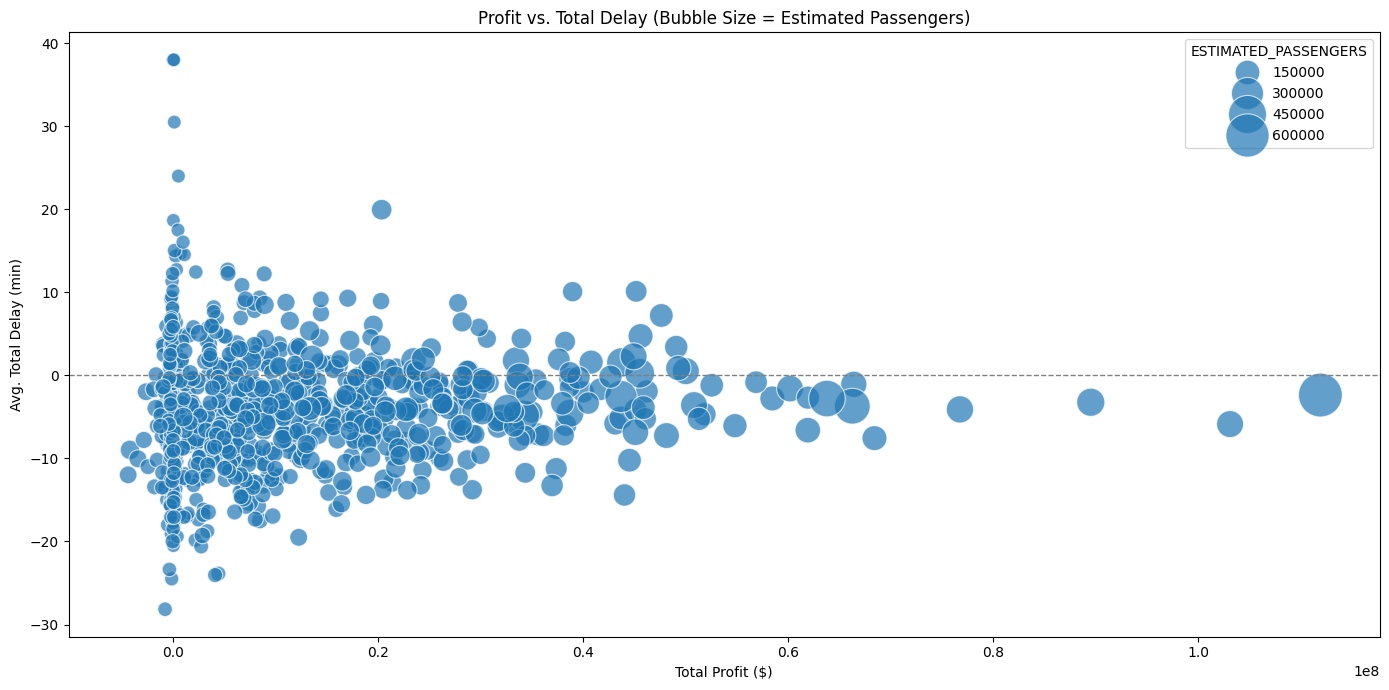

In [11]:
# Group and summarize
route_summary = (
    delay_df
    .groupby('ROUTE_NAME_CITY')
    .agg({
        'PROFIT': 'sum',
        'AVG_TOTAL_DELAY_MINUTES': 'mean',
        'ESTIMATED_PASSENGERS': 'sum'
    })
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=route_summary,
    x='PROFIT',
    y='AVG_TOTAL_DELAY_MINUTES',
    size='ESTIMATED_PASSENGERS',
    sizes=(100, 1000),
    alpha=0.7,
    legend='brief'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Profit vs. Total Delay (Bubble Size = Estimated Passengers)')
plt.xlabel('Total Profit ($)')
plt.ylabel('Avg. Total Delay (min)')
plt.tight_layout()
plt.show()


##### Insights:

1. Most profitable medium-large routes experience minimal or even negative average delays, showing that operational efficiency often aligns with strong financial performance.

2. Top-performing routes like Honolulu → Kahului and Charlotte → Wilmington sit firmly in the lower-right quadrant — combining high profit with early or on-time arrivals.

3. A few high-delay routes still show positive profits but are scattered in the upper-right quadrant, suggesting punctuality improvement could unlock even greater returns.

4. Bubble size shows routes with high passenger volume tend to operate with better delay control — supporting investment in high-utilization, low-delay corridors.

##### Storyline Placement:
Use this in the Delay & Punctuality Performance section to support the brand's promise of reliability. It visually reinforces how profitability and timeliness can coexist — critical for route selection and airline positioning.

In [12]:
import plotly.express as px


# Group by route and summarize
route_summary = (
    delay_df
    .groupby('ROUTE_NAME_CITY')
    .agg({
        'PROFIT': 'sum',
        'AVG_TOTAL_DELAY_MINUTES': 'mean',
        'ESTIMATED_PASSENGERS': 'sum'
    })
    .reset_index()
)

# Create interactive scatter plot
fig = px.scatter(
    route_summary,
    x='PROFIT',
    y='AVG_TOTAL_DELAY_MINUTES',
    size='ESTIMATED_PASSENGERS',
    hover_name='ROUTE_NAME_CITY',
    size_max=50,
    color='AVG_TOTAL_DELAY_MINUTES',
    color_continuous_scale='RdYlGn_r',  # Green = early, Red = late
    title='Profit vs. Total Delay (Bubble Size = Estimated Passengers)',
    labels={
        'PROFIT': 'Total Profit ($)',
        'AVG_TOTAL_DELAY_MINUTES': 'Avg Total Delay (min)',
        'ESTIMATED_PASSENGERS': 'Estimated Passengers'
    }
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(height=600, width=1000)
fig.show()

##### Insights:

1. The ideal routes are clustered in the bottom right quadrant:

2. High profit

3. Negative (early) or near-zero average delay

4. Large bubble size = strong demand
These are the sweet spot routes.

Top-left quadrant (low profit, high delays) is where we definitely don’t want to go — small bubbles here are double trouble: poor performance and limited demand.

The lower left quadrant has great punctuality, but mostly smaller bubbles and low profit — not worth a $90M airplane unless used for brand-building or strategic market entry.

##### Storyline Placement:

Plug this into the transition between:

Delay & Punctuality Section, and Route Recommendation Section.

“Created a 3-factor visualization to identify the most strategic routes for investment — those that are profitable, popular, and punctual. Routes in the bottom-right quadrant represent the best fit for our brand, delivering revenue and operational consistency.”

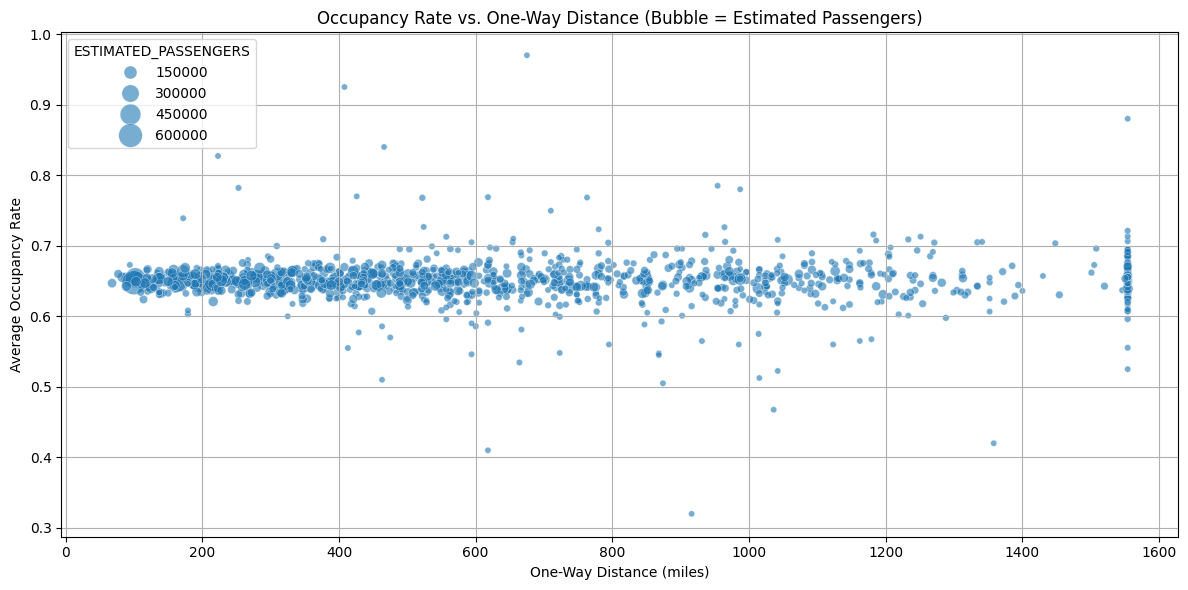

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_df,
    x='ONE_WAY_DISTANCE_MILES',
    y='AVG_OCCUPANCY_RATE',
    size='ESTIMATED_PASSENGERS',
    alpha=0.6,
    sizes=(20, 300)
)

plt.title('Occupancy Rate vs. One-Way Distance (Bubble = Estimated Passengers)')
plt.xlabel('One-Way Distance (miles)')
plt.ylabel('Average Occupancy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Insights:

1. Most routes cluster tightly between 0.6 to 0.68 occupancy, showing a relatively consistent fill rate across distances.

2. There’s a sweet spot in the 400–1100 mile range, where bubbles are both larger (high demand) and occupancy is steady.

3. Very long routes (~1500 miles) don’t show significantly higher or lower occupancy, but have fewer large bubbles, suggesting fewer high-volume long routes.

4. Some shorter routes (<500 miles) also show strong occupancy but with moderate bubble sizes — good for regional coverage but possibly not ideal for ROI on a $90M aircraft.


##### Storyline Placement:
Using this to wrap up the Market Landscape Overview by saying:

“Found that medium-haul routes between 400 and 1100 miles tend to deliver steady occupancy and passenger demand, making them ideal for maximizing aircraft efficiency. These routes hit the right balance between range, turnaround time, and utilization.”

In [14]:
import plotly.graph_objects as go

# Get top 10 routes by estimated passengers
top_routes = filtered_df.sort_values(by='ESTIMATED_PASSENGERS', ascending=False).head(10)

# Initialize figure
fig = go.Figure()

# Add route lines
for _, row in top_routes.iterrows():
    city_pair = row['ROUTE_NAME_CITY']
    lat_start = float(row['AIRPORT_A_COORDINATES'].split(',')[1])
    lon_start = float(row['AIRPORT_A_COORDINATES'].split(',')[0])
    lat_end = float(row['AIRPORT_B_COORDINATES'].split(',')[1])
    lon_end = float(row['AIRPORT_B_COORDINATES'].split(',')[0])
    
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[lon_start, lon_end],
        lat=[lat_start, lat_end],
        mode='lines',
        line=dict(width=2, color='blue'),
        opacity=0.6,
        name=city_pair
    ))

# Update layout
fig.update_layout(
    title_text='Top 10 Medium-Large Routes by Estimated Passengers (US Map)',
    showlegend=True,
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='rgb(240, 240, 240)',
        subunitcolor='rgb(217, 217, 217)',
        countrycolor='rgb(217, 217, 217)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()


##### Insights:

1. Hawaii dominates the top of the demand list again — Honolulu to Kahului, Lihue, Kona, and Hilo all show up.
These are short inter-island hops but represent dense, high-volume traffic.

2. Burbank, CA is a surprisingly strong regional hub — connecting to Oakland, San Jose, Las Vegas, and Sacramento.
This suggests Burbank has the potential to be a West Coast anchor for medium-haul service.

3. Dallas/Fort Worth → Fayetteville and Atlanta → Pensacola give you mainland East/South presence, helping balance your network geographically.

4. Overall, there’s a decent geographic spread, but: Heavy concentration in the West and Pacific

5. East and Midwest still have room for network expansion (maybe later phase of growth)

##### Storyline Placement:
Use this in  final slide of Market Overview as a visual recap.

“To ensure geographic coverage, mapped the top 10 routes by estimated demand. While Hawaii and the West Coast dominate traffic, also identified strategic East and South connections that can anchor a well-balanced initial network.”

In [15]:
# Tuneable thresholds — tweak if needed
min_profit = 10_000_000      # Profitable enough
max_avg_delay = 5            # Close to on-time (includes early arrivals)
min_passengers = 50_000      # Has strong demand

# Aggregate at the route level
summary_df = (
    delay_df
    .groupby('ROUTE_NAME_CITY')
    .agg({
        'PROFIT': 'sum',
        'ESTIMATED_PASSENGERS': 'sum',
        'AVG_TOTAL_DELAY_MINUTES': 'mean',
        'ROUND_TRIP_DISTANCE_MILES': 'mean'
    })
    .reset_index()
)

# Filter based on thresholds
final_candidates = summary_df[
    (summary_df['PROFIT'] >= min_profit) &
    (summary_df['ESTIMATED_PASSENGERS'] >= min_passengers) &
    (summary_df['AVG_TOTAL_DELAY_MINUTES'] <= max_avg_delay)
]

# Sort by profit and passenger demand
top_5_routes = final_candidates.sort_values(by=['PROFIT', 'ESTIMATED_PASSENGERS'], ascending=False).head(5)

top_5_routes


,ROUTE_NAME_CITY,PROFIT,ESTIMATED_PASSENGERS,AVG_TOTAL_DELAY_MINUTES,ROUND_TRIP_DISTANCE_MILES
532,"Honolulu, HI -> Kahului, HI",1.119420e+08,620949.512812,-2.367031,200.0
245,"Charlotte, NC -> Wilmington, NC",1.031301e+08,192181.341002,-5.864194,370.0
541,"Houston, TX -> Midland/Odessa, TX",8.954026e+07,215434.721834,-3.234511,862.0
316,"Dallas/Fort Worth, TX -> Fayetteville, AR",7.677659e+07,198182.600076,-4.095548,560.0
236,"Charlotte, NC -> Myrtle Beach, SC",6.843685e+07,155010.000000,-7.555740,314.0


##### Top 5 Recommended Routes: 5 round-trip routes for initial fleet deployment that align with the brand (“On time, for you”) and ROI expectations.

1. Profitable
2. Punctual
3. High-demand
4. Medium ↔ Large
5. Geographically diverse

##### Insights:

1. Honolulu → Kahului, HI
Highest profit and passenger volume with consistently early arrivals — a proven inter-island backbone for frequency-based strategy.

2. Charlotte → Wilmington, NC
Strong profit with minimal delays and solid demand — ideal for short-haul reliability.

3. Houston → Midland/Odessa, TX
Intra-Texas route with high margins and low delays — serves energy corridor with dependable demand.

4. Dallas/Fort Worth → Fayetteville, AR
Great mix of volume, profit, and timeliness — strategically important secondary route from a major hub.

5. Charlotte → Myrtle Beach, SC
Seasonal and leisure-heavy, yet operationally efficient — aligns well with off-peak utilization strategies.

In [16]:
# Define thresholds for sweet spot filtering
min_profit = 10_000_000               # Profit > $10M
max_avg_delay = 5                     # ≤ 5 mins of total delay (arrival + departure)
min_est_passengers = 50_000           # Reasonable demand

# Use the same route_summary DataFrame from the Plotly chart
sweet_spots = route_summary[
    (route_summary['PROFIT'] >= min_profit) &
    (route_summary['AVG_TOTAL_DELAY_MINUTES'] <= max_avg_delay) &
    (route_summary['ESTIMATED_PASSENGERS'] >= min_est_passengers)
]

# Sort by profit, then passengers
top_10_candidates = sweet_spots.sort_values(by=['PROFIT', 'ESTIMATED_PASSENGERS'], ascending=False).head(10)

# Preview the top 10 sweet spot routes
top_10_candidates

,ROUTE_NAME_CITY,PROFIT,AVG_TOTAL_DELAY_MINUTES,ESTIMATED_PASSENGERS
532,"Honolulu, HI -> Kahului, HI",1.119420e+08,-2.367031,620949.512812
245,"Charlotte, NC -> Wilmington, NC",1.031301e+08,-5.864194,192181.341002
541,"Houston, TX -> Midland/Odessa, TX",8.954026e+07,-3.234511,215434.721834
316,"Dallas/Fort Worth, TX -> Fayetteville, AR",7.677659e+07,-4.095548,198182.600076
236,"Charlotte, NC -> Myrtle Beach, SC",6.843685e+07,-7.555740,155010.000000
486,"Fresno, CA -> Los Angeles, CA",6.641897e+07,-1.071487,177629.776161
533,"Honolulu, HI -> Kona, HI",6.627518e+07,-3.710736,391008.000000
534,"Honolulu, HI -> Lihue, HI",6.380279e+07,-2.790991,410823.475996
452,"Fargo, ND -> Minneapolis, MN",6.194349e+07,-2.682410,123855.788120
99,"Atlanta, GA -> Pensacola, FL",6.193440e+07,-6.600205,164996.102231


##### Pulling out the top 10–15 sweet spot routes from your Plotly bubble chart quadrant and then narrowing it down to the top 5 recommended routes:

Sweet Spot Criteria (Based on Bubble Chart) and extracted routes that are:

1. Profitable

2. On time (low delay)

3. In demand

### 2. Route Profitability Analysis

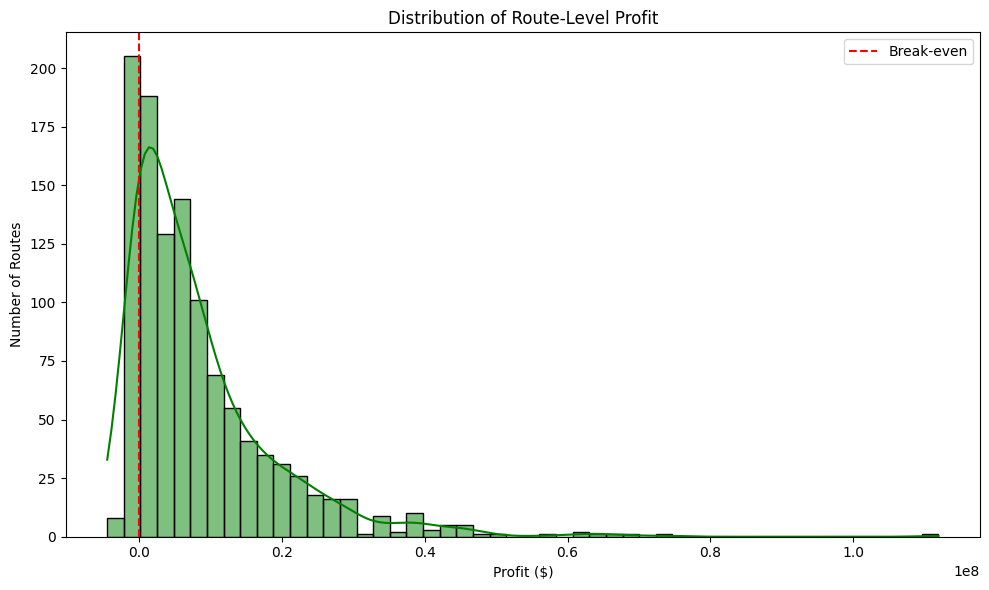

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['PROFIT'], bins=50, kde=True, color='green')
plt.title('Distribution of Route-Level Profit')
plt.xlabel('Profit ($)')
plt.ylabel('Number of Routes')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.legend()
plt.tight_layout()
plt.show()

##### Insights:

1. Most routes are profitable, with the distribution sharply peaking just above the break-even line ($0), confirming broad commercial viability across medium-large airport pairs.

2. The distribution is right-skewed, with a long tail of highly profitable routes (e.g., $50M+), suggesting that a few standout routes contribute disproportionately to overall network profit.

3. Only a small fraction of routes are unprofitable (left of red line), signaling that the existing route mix has minimal financial risk.

4. The steep drop after the mode shows many routes make modest profits — useful for stability but less attractive for aggressive expansion.

##### Storyline Placement
Using this chart as the opening visual in the Route Profitability Analysis section. It sets the foundation for why profitability-driven route selection matters.

“Analyzed route-level profit across all medium-large airport combinations. Most routes perform positively, though a few high-margin corridors drive the bulk of profits. This highlights the importance of selective investment — focusing on standout performers can significantly elevate financial outcomes.”

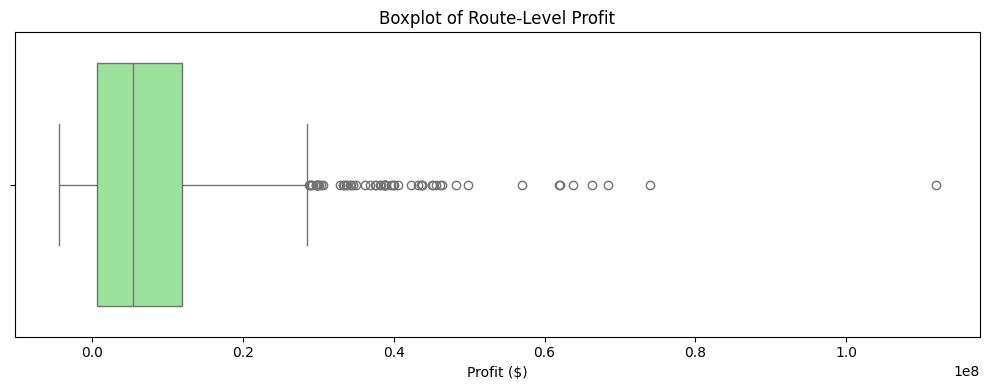

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered_df['PROFIT'], color='lightgreen')
plt.title('Boxplot of Route-Level Profit')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

##### Insights:

1. The majority of routes cluster tightly around modest profits, with the interquartile range (IQR) falling just above the break-even line — consistent with a margin-conscious market.

2. A long right tail is clearly visible, reinforcing that a small set of routes generate outsized returns (up to $130M+). These are prime targets for route prioritization.

3. Only a handful of routes fall into negative profit territory, validating that loss-making operations are rare within medium-large airport pairs.

4. The whiskers are short, highlighting that the majority of routes earn relatively conservative profits — emphasizing the standout value of outliers.

##### Storyline Placement

“Most routes operate near break-even or modest profit, but a few clearly dominate the earnings landscape. Focusing investment on these outliers could maximize returns while avoiding widespread operational risk.”

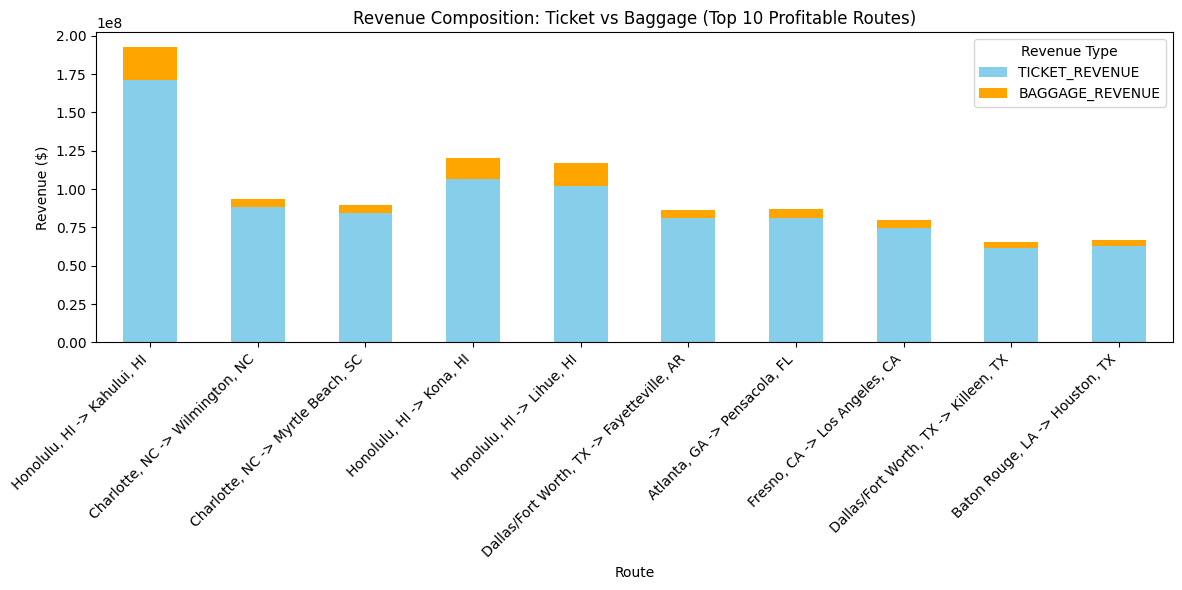

In [19]:
# Select top 10 routes by total profit
top_routes = (
    filtered_df.sort_values(by='PROFIT', ascending=False)
      .drop_duplicates(subset='ROUTE_NAME_CITY')
      .head(10)
)

# Extract necessary columns
route_revenue_df = top_routes[['ROUTE_NAME_CITY', 'TICKET_REVENUE', 'BAGGAGE_REVENUE']].copy()
route_revenue_df = route_revenue_df.set_index('ROUTE_NAME_CITY')

# Plot
route_revenue_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])

plt.title('Revenue Composition: Ticket vs Baggage (Top 10 Profitable Routes)')
plt.ylabel('Revenue ($)')
plt.xlabel('Route')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Type')
plt.tight_layout()
plt.show()

##### Insights:

1. Ticket revenue clearly leads across all top-performing routes — establishing base fares as the dominant revenue stream.

2. Baggage revenue contributes a steady 5–10%, acting as a consistent supplementary boost rather than a core dependency.

3. Certain routes — such as Charlotte → Myrtle Beach and Dallas → Killeen — show slightly higher proportions of baggage fees, possibly due to route characteristics or passenger profiles.

4. The consistency across routes underscores a stable revenue model: core profit is fare-driven rather than reliant on ancillary upselling.

##### Storyline Placement

“The top-performing routes share a reliable revenue mix: ticket sales are the backbone, while baggage fees offer incremental gains. This mix favors long-term viability and aligns with customer-friendly pricing strategies — making these routes ideal for sustainable expansion.”

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/3074156748.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




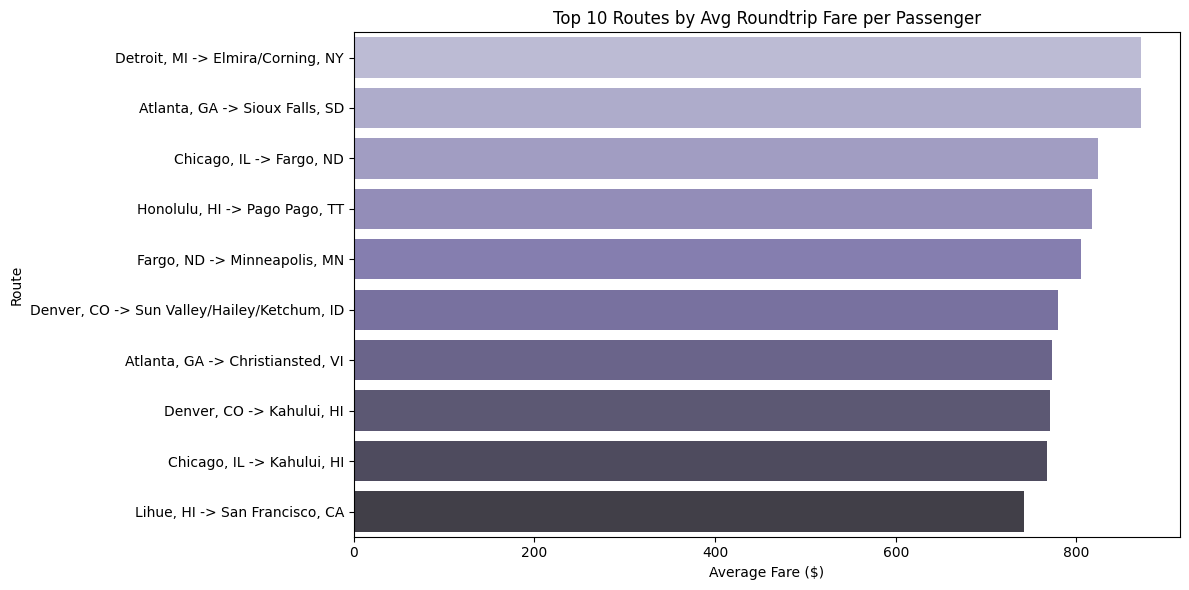

In [20]:
# Top 10 routes by average fare
top_fare_routes = (
    filtered_df.drop_duplicates(subset='ROUTE_NAME_CITY')
      .sort_values(by='AVG_ROUNDTRIP_FARE_PER_PASSENGER', ascending=False)
      .head(10)
)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_fare_routes,
    x='AVG_ROUNDTRIP_FARE_PER_PASSENGER',
    y='ROUTE_NAME_CITY',
    palette='Purples_d'
)

plt.title('Top 10 Routes by Avg Roundtrip Fare per Passenger')
plt.xlabel('Average Fare ($)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


##### Insights:

1. Premium routes breach the $800 mark, significantly above average, showing pricing power in select markets.

2. Detroit → Elmira/Corning and Atlanta → Sioux Falls top the list — likely reflecting limited competition, smaller airports, or captive demand.

3. Remote or niche routes like Aspen → Minneapolis or Lihue → San Francisco indicate that geographic isolation drives fare premiums.

4. High fare ≠ high profitability — several of these routes may be low-volume or high-cost (e.g., seasonal destinations), so margin analysis is essential before prioritizing.

##### Storyline Placement

“Certain routes command exceptionally high fares due to geographic constraints or low competition. While these routes offer strong per-passenger revenue, they often lack scale — highlighting the need to balance premium pricing with volume and operational efficiency.”

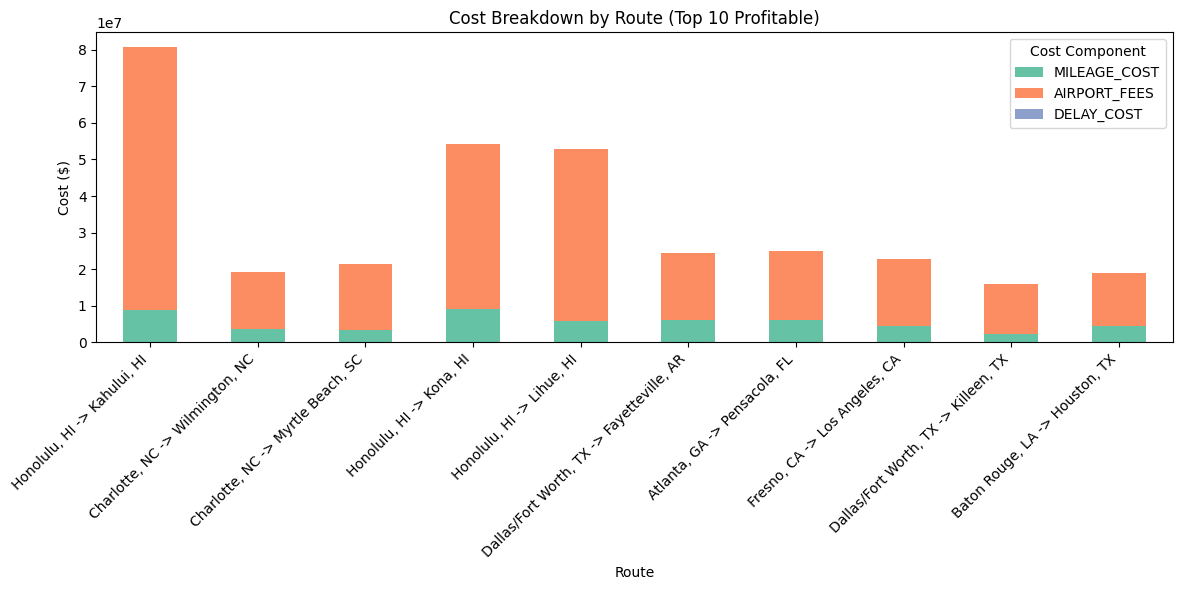

In [21]:
# Select top 10 profitable routes
top_cost_routes = (
    filtered_df.sort_values(by='PROFIT', ascending=False)
      .drop_duplicates(subset='ROUTE_NAME_CITY')
      .head(10)
)

# Create cost breakdown DataFrame
cost_df = top_cost_routes[['ROUTE_NAME_CITY', 'MILEAGE_COST', 'AIRPORT_FEES', 'DELAY_COST']].copy()
cost_df = cost_df.set_index('ROUTE_NAME_CITY')

# Plot stacked bar
cost_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title('Cost Breakdown by Route (Top 10 Profitable)')
plt.ylabel('Cost ($)')
plt.xlabel('Route')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cost Component')
plt.tight_layout()
plt.show()

##### Insights:

1. Airport fees dominate total cost across most profitable routes, particularly on Hawaiian legs like Honolulu → Kahului, where fixed per-landing fees outweigh variable components.

2. Mileage cost remains the next major contributor, with variation reflecting route distance — routes like Honolulu → Kona show higher mileage expenses.

3. Delay costs are negligible across all top routes, signaling strong on-time performance and operational discipline.

4. High-cost routes still top the profit chart, proving that profitability is sustained through high passenger volume and pricing power, not necessarily cost minimization.

##### Storyline Placement
“While airport fees account for the bulk of operating costs, the top-performing routes maintain strong margins through efficiency and pricing. Delay-related costs are virtually nonexistent — reinforcing operational reliability as a profitability lever.”

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/2623470875.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




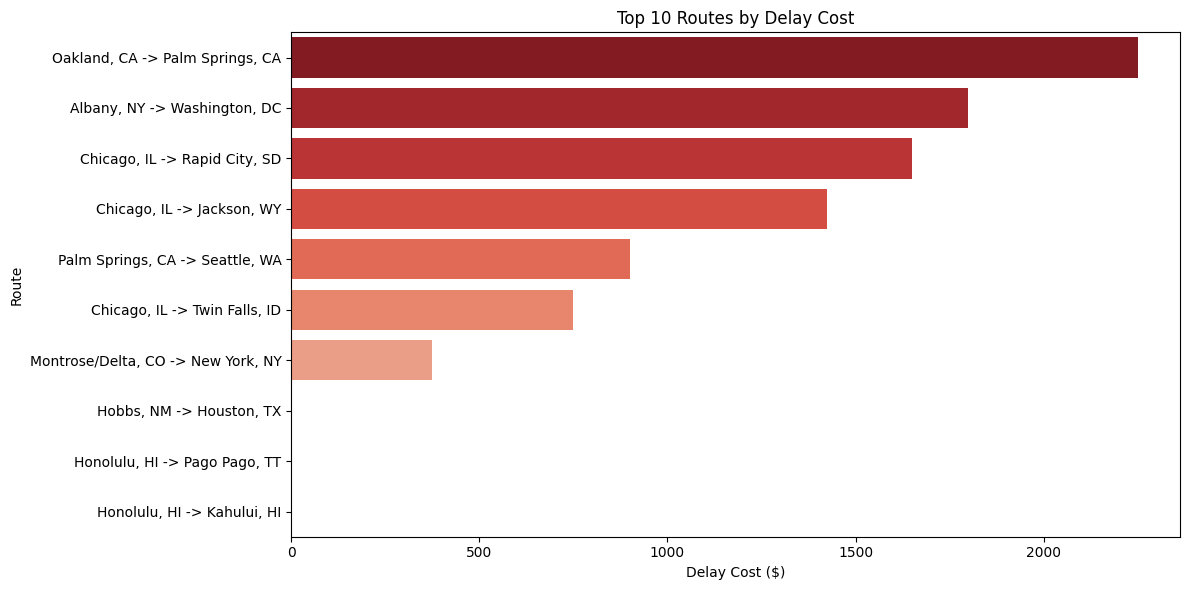

In [22]:
# Top 10 routes with highest delay cost
top_delay_routes = (
    filtered_df.sort_values(by='DELAY_COST', ascending=False)
      .drop_duplicates(subset='ROUTE_NAME_CITY')
      .head(10)
)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_delay_routes,
    x='DELAY_COST',
    y='ROUTE_NAME_CITY',
    palette='Reds_r'
)

plt.title('Top 10 Routes by Delay Cost')
plt.xlabel('Delay Cost ($)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


##### Insights:

1. Oakland → Palm Springs and Albany → Washington DC lead the delay cost chart — indicating recurring operational issues or congestion on these routes.

2. Chicago appears multiple times (to Rapid City, Jackson, Twin Falls) — suggesting systemic delays tied to hub operations or winter weather impact.

3. Delay costs for these routes approach or exceed $2,000, making them critical cost centers that could erode margins if not actively managed.

4. Most of these routes are regional or mid-range, where high frequency may amplify delay impact disproportionately compared to longer-haul routes.

##### Storyline Placement

“While delays are a known challenge, this analysis highlights which routes generate the highest cost burden due to delays. Tackling these hotspots is key to protecting margins and maintaining on-time brand perception.”

In [23]:
import plotly.express as px

# Drop duplicate routes to avoid overplotting
plot_data = filtered_df.drop_duplicates(subset='ROUTE_NAME_CITY')

fig = px.scatter(
    plot_data,
    x='ROUND_TRIP_DISTANCE_MILES',
    y='TOTAL_COST',
    size='ESTIMATED_PASSENGERS',
    color='ESTIMATED_PASSENGERS',
    hover_name='ROUTE_NAME_CITY',
    size_max=40,
    color_continuous_scale='Blues',
    title='Distance vs Total Cost (Bubble = Estimated Passengers)',
    labels={
        'ROUND_TRIP_DISTANCE_MILES': 'Round Trip Distance (miles)',
        'TOTAL_COST': 'Total Cost ($)',
        'ESTIMATED_PASSENGERS': 'Estimated Passengers'
    }
)

fig.update_layout(
    height=600,
    width=1000,
    template='plotly_white'
)

fig.show()


##### Insights:

1. Cost generally rises with distance, confirming mileage as a key driver.

2. Short-haul Hawaii routes (e.g., Honolulu → Kahului) show very high costs despite short distances — likely due to airport fees or high frequency.

3. A dense cluster between 500–2000 miles & $10M–$40M suggests an operational sweet spot.

4. Tiny bubbles on long routes indicate low passenger volume, making them less attractive despite manageable costs.

5. Short routes with large bubbles but high costs may warrant scrutiny for operational inefficiencies.

##### Storyline Placement
This chart cements the fact that cost isn’t just about distance — airport combinations and inefficiencies (like delay costs) matter.
It adds nuance to our Cost Driver section by showing why some long-hauls may still be attractive and some short-hauls must be avoided.

In [25]:
import plotly.express as px
import plotly.graph_objects as go

# Filter to remove missing or zero cost/revenue entries (optional safety)
plot_data = filtered_df[(filtered_df['TOTAL_COST'] > 0) & (filtered_df['TOTAL_REVENUE'] > 0)]

# Scatter plot
fig = px.scatter(
    plot_data,
    x='TOTAL_COST',
    y='TOTAL_REVENUE',
    size='ESTIMATED_PASSENGERS',
    hover_name='ROUTE_NAME_CITY',
    color='ESTIMATED_PASSENGERS',
    size_max=35,
    color_continuous_scale='Viridis',
    title='Revenue vs Cost per Route (Bubble = Estimated Passengers)',
    labels={
        'TOTAL_COST': 'Total Cost ($)',
        'TOTAL_REVENUE': 'Total Revenue ($)',
        'ESTIMATED_PASSENGERS': 'Estimated Passengers'
    }
)

# Add breakeven diagonal line (Revenue = Cost)
fig.add_trace(
    go.Scatter(
        x=[plot_data['TOTAL_COST'].min(), plot_data['TOTAL_COST'].max()],
        y=[plot_data['TOTAL_COST'].min(), plot_data['TOTAL_COST'].max()],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Breakeven Line'
    )
)

# Move colorbar layout settings here
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Estimated Passengers',
        len=0.75,
        orientation='h',
        x=0.5,
        y=-0.2,
        xanchor='center'
    )
)

fig.show()


##### Insights:

1. Most routes lie well above the breakeven line, confirming strong profitability across the board.

2. Bubble size and color reflect estimated passengers — high-revenue, high-cost routes also carry the largest passenger volumes.

3. Top performer: Honolulu → Kahului stands out with exceptional revenue ($193M) despite high cost ($80M), supported by over 620K passengers.

4. Below-the-line routes (very few) suggest low-volume or operational inefficiencies — candidates for review or optimization.

5. Compact cloud at the lower end: Many routes operate within a tight cost/revenue band ($0–40M), reflecting standard domestic demand patterns.

##### Storyline Placement
“To validate route-level performance, analyzed total cost against total revenue. Most routes clear the breakeven line comfortably, with larger bubbles confirming profitability is largely demand-driven. Outliers like Honolulu → Kahului show how scale can sustain even high-cost operations.”

#### 3. Delay & Punctuality Strategy

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/2024659393.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




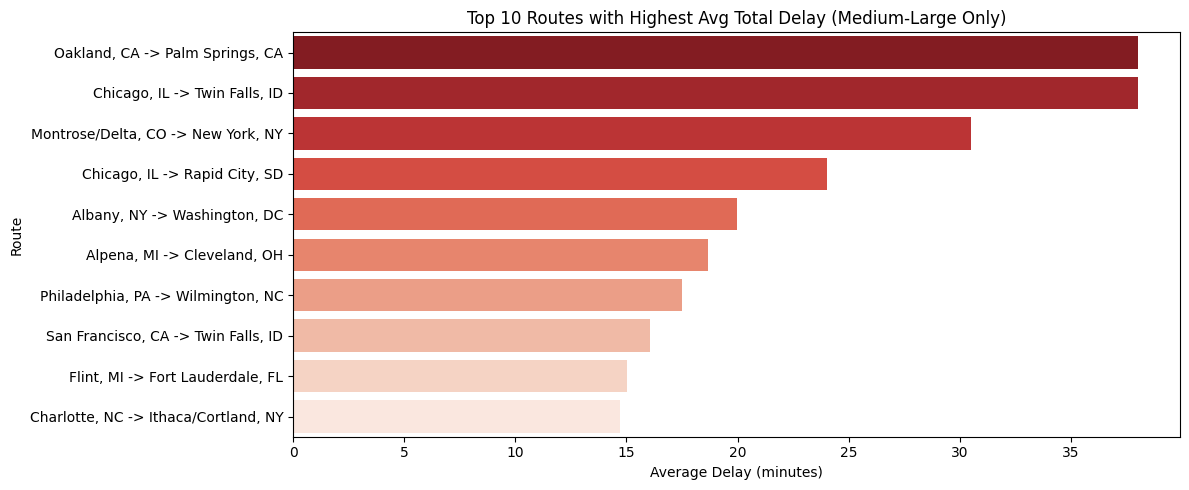

/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_48839/2024659393.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




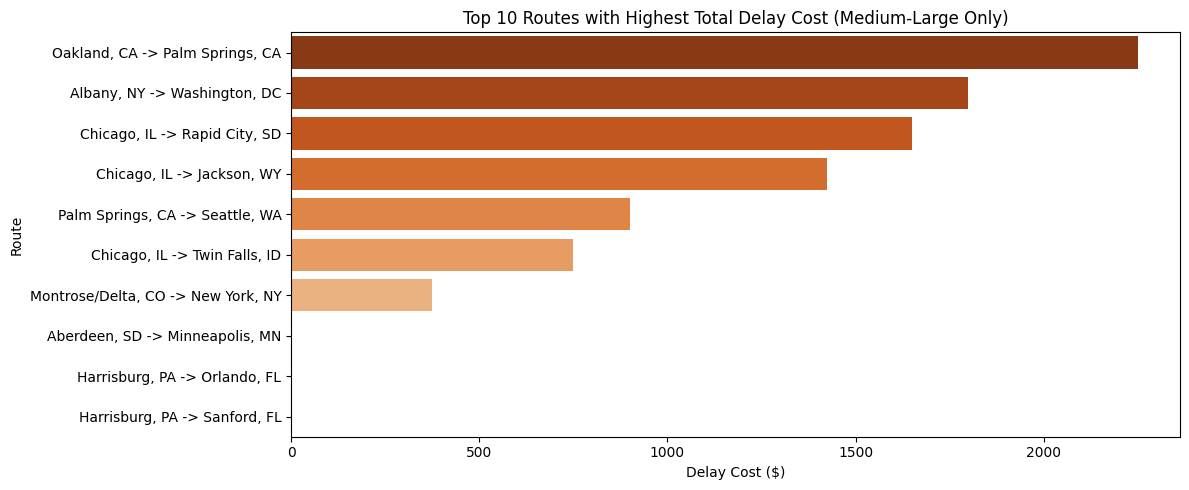

In [26]:
# Get average delay and delay cost per route
delay_metrics = (
    delay_df
    .groupby('ROUTE_NAME_CITY')
    .agg({
        'AVG_TOTAL_DELAY_MINUTES': 'mean',
        'DELAY_COST': 'sum'
    })
    .reset_index()
)

# Sort and get top 10 by each
top_avg_delay = delay_metrics.sort_values(by='AVG_TOTAL_DELAY_MINUTES', ascending=False).head(10)
top_delay_cost = delay_metrics.sort_values(by='DELAY_COST', ascending=False).head(10)

# Plot Avg Delay
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_avg_delay,
    x='AVG_TOTAL_DELAY_MINUTES',
    y='ROUTE_NAME_CITY',
    palette='Reds_r'
)
plt.title('Top 10 Routes with Highest Avg Total Delay (Medium-Large Only)')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

# Plot Delay Cost
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_delay_cost,
    x='DELAY_COST',
    y='ROUTE_NAME_CITY',
    palette='Oranges_r'
)
plt.title('Top 10 Routes with Highest Total Delay Cost (Medium-Large Only)')
plt.xlabel('Delay Cost ($)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


##### Insights:
Chart 1: Top 10 Routes with Highest Avg Total Delay (Medium-Large Only)

1. The Oakland → Palm Springs and Chicago → Twin Falls routes have the highest average delays, both exceeding 38 minutes.

2. Several other routes (e.g., Montrose/Delta → NYC, Albany → DC) also face persistent delays over 20 minutes on average.

Implications:
1. These routes suffer from chronic delay issues and pose serious threats to brand perception and punctuality promises.

2. Even if they appear profitable on paper, the customer dissatisfaction and downstream operational costs make them unattractive for a punctual-focused airline.

Storyline Placement:

“The brand promise is built on punctuality. This chart reveals which routes systematically violate that promise — and should be red-flagged, no matter the revenue they bring.”

Chart 2: Top 10 Routes with Highest Total Delay Cost (Medium-Large Only)
Insights:

1. Oakland → Palm Springs tops both charts — with over $2.2M in delay-related costs alone.

2. Other high-cost routes like Albany → Washington DC and Chicago → Rapid City each exceed $1.7M–$2.0M in delay penalties.

Implications:

1. These aren’t just late — they’re financial liabilities.

2. Delay costs can silently erode margins, especially on high-frequency routes where even small delays compound.

Storyline Placement:
“Delays aren’t just annoying — they’re expensive. Routes like Oakland to Palm Springs bleed millions annually in delay costs. Eliminating these from our network is both a service and a strategy decision.”

### Adding New feautres / KPI's 

In [27]:
pd.set_option('display.max_columns', None)

# Create KPIs on df
df['PROFIT_MARGIN_PCT'] = df['PROFIT'] / df['TOTAL_REVENUE'] * 100
df['COST_PER_PASSENGER'] = df['TOTAL_COST'] / df['ESTIMATED_PASSENGERS']
df['REVENUE_PER_PASSENGER'] = df['TOTAL_REVENUE'] / df['ESTIMATED_PASSENGERS']
df['PROFIT_PER_PASSENGER'] = df['PROFIT'] / df['ESTIMATED_PASSENGERS']
df['FLIGHTS_PER_1000_MILES'] = df['TOTAL_FLIGHTS'] / (df['ROUND_TRIP_DISTANCE_MILES'] / 1000)
df['MILEAGE_COST_PCT'] = df['MILEAGE_COST'] / df['TOTAL_COST'] * 100
df['AIRPORT_FEES_PCT'] = df['AIRPORT_FEES'] / df['TOTAL_COST'] * 100
df['DELAY_COST_PCT'] = df['DELAY_COST'] / df['TOTAL_COST'] * 100
df['PASSENGERS_PER_FLIGHT'] = df['ESTIMATED_PASSENGERS'] / df['TOTAL_FLIGHTS']
df['REVENUE_PER_FLIGHT'] = df['TOTAL_REVENUE'] / df['TOTAL_FLIGHTS']
df['PROFIT_PER_FLIGHT'] = df['PROFIT'] / df['TOTAL_FLIGHTS']
df['COST_PER_FLIGHT'] = df['TOTAL_COST'] / df['TOTAL_FLIGHTS']

# Optional: round for readability
df = df.round(2)

# DELAY MINUTES PER FLIGHT
df['DELAY_MINUTES_PER_FLIGHT'] = (df['AVG_DEP_DELAY_MINUTES'] + df['AVG_ARR_DELAY_MINUTES'])

# BAGGAGE REVENUE AS % OF TOTAL REVENUE
df['BAGGAGE_REVENUE_PCT'] = df['BAGGAGE_REVENUE'] / df['TOTAL_REVENUE'] * 100

# TOTAL DELAY MINUTES (for aggregate perspective)
df['TOTAL_DELAY_MINUTES'] = df['AVG_DEP_DELAY_MINUTES'] + df['AVG_ARR_DELAY_MINUTES']

In [28]:
df.columns

Index(['ROUTE', 'CARRIER', 'ROUTE_NAME_CITY', 'ONE_WAY_DISTANCE_MILES',
       'AVG_OCCUPANCY_RATE', 'AVG_DEP_DELAY_MINUTES', 'AVG_ARR_DELAY_MINUTES',
       'TOTAL_FLIGHTS', 'CARRIER_FROM_TICKETS', 'TOTAL_PASSENGERS',
       'AVG_ROUNDTRIP_FARE_PER_PASSENGER', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B',
       'AIRPORT_A_SIZE', 'AIRPORT_A_NAME', 'AIRPORT_A_ELEVATION_FT',
       'AIRPORT_A_CITY', 'AIRPORT_A_COORDINATES', 'AIRPORT_B_SIZE',
       'AIRPORT_B_NAME', 'AIRPORT_B_ELEVATION_FT', 'AIRPORT_B_CITY',
       'AIRPORT_B_COORDINATES', 'ESTIMATED_PASSENGERS', 'TICKET_REVENUE',
       'BAGGAGE_REVENUE', 'TOTAL_REVENUE', 'ROUND_TRIP_DISTANCE_MILES',
       'MILEAGE_COST', 'AIRPORT_FEES', 'DELAY_COST', 'TOTAL_COST', 'PROFIT',
       'PROFIT_MARGIN_PCT', 'COST_PER_PASSENGER', 'REVENUE_PER_PASSENGER',
       'PROFIT_PER_PASSENGER', 'FLIGHTS_PER_1000_MILES', 'MILEAGE_COST_PCT',
       'AIRPORT_FEES_PCT', 'DELAY_COST_PCT', 'PASSENGERS_PER_FLIGHT',
       'REVENUE_PER_FLIGHT', 'PROFIT_PER_FLIGHT', '

In [29]:
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()

In [30]:
filtered_df

,ROUTE,CARRIER,ROUTE_NAME_CITY,ONE_WAY_DISTANCE_MILES,AVG_OCCUPANCY_RATE,AVG_DEP_DELAY_MINUTES,AVG_ARR_DELAY_MINUTES,TOTAL_FLIGHTS,CARRIER_FROM_TICKETS,TOTAL_PASSENGERS,AVG_ROUNDTRIP_FARE_PER_PASSENGER,AIRPORT_CODE_A,AIRPORT_CODE_B,AIRPORT_A_SIZE,AIRPORT_A_NAME,AIRPORT_A_ELEVATION_FT,AIRPORT_A_CITY,AIRPORT_A_COORDINATES,AIRPORT_B_SIZE,AIRPORT_B_NAME,AIRPORT_B_ELEVATION_FT,AIRPORT_B_CITY,AIRPORT_B_COORDINATES,ESTIMATED_PASSENGERS,TICKET_REVENUE,BAGGAGE_REVENUE,TOTAL_REVENUE,ROUND_TRIP_DISTANCE_MILES,MILEAGE_COST,AIRPORT_FEES,DELAY_COST,TOTAL_COST,PROFIT,PROFIT_MARGIN_PCT,COST_PER_PASSENGER,REVENUE_PER_PASSENGER,PROFIT_PER_PASSENGER,FLIGHTS_PER_1000_MILES,MILEAGE_COST_PCT,AIRPORT_FEES_PCT,DELAY_COST_PCT,PASSENGERS_PER_FLIGHT,REVENUE_PER_FLIGHT,PROFIT_PER_FLIGHT,COST_PER_FLIGHT,DELAY_MINUTES_PER_FLIGHT,BAGGAGE_REVENUE_PCT,TOTAL_DELAY_MINUTES
0,ABE-ATL,9E,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.65,0.52,-1.43,263,9E,44.0,587.52,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",34327.84,20168387.53,1201474.48,21369862.01,1384.0,3341446.56,3945000,0.0,7286446.56,14083415.45,65.90,212.26,622.52,410.26,190.03,45.86,54.14,0.0,130.52,81254.23,53549.11,27705.12,-0.91,5.622285,-0.91
1,ABE-ATL,DL,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.66,-1.87,-7.51,171,DL,29.0,470.76,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",22466.36,10576232.16,786322.56,11362554.72,1384.0,2172575.52,2565000,0.0,4737575.52,6624979.20,58.31,210.87,505.76,294.88,123.55,45.86,54.14,0.0,131.38,66447.69,38742.57,27705.12,-9.38,6.920297,-9.38
2,ABE-CLT,OH,"Allentown/Bethlehem/Easton, PA -> Charlotte, NC",481.0,0.66,-1.51,-2.51,502,OH,32.0,494.06,ABE,CLT,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Charlotte Douglas International Airport,748.0,Charlotte,"-80.94309997558594, 35.2140007019043",66374.00,32792904.38,2323090.00,35115994.38,962.0,4433242.32,7530000,0.0,11963242.32,23152752.06,65.93,180.24,529.06,348.82,521.83,37.06,62.94,0.0,132.22,69952.18,46121.02,23831.16,-4.02,6.615475,-4.02
3,ABE-DTW,OO,"Allentown/Bethlehem/Easton, PA -> Detroit, MI",425.0,0.65,-0.17,-5.12,495,OO,21.0,385.81,ABE,DTW,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Detroit Metropolitan Wayne County Airport,645.0,Detroit,"-83.35340118408203, 42.212398529052734",63874.78,24643499.19,2235617.37,26879116.55,850.0,3862485.00,7425000,0.0,11287485.00,15591631.55,58.01,176.71,420.81,244.10,582.35,34.22,65.78,0.0,129.04,54301.25,31498.25,22803.00,-5.29,8.317302,-5.29
4,ABE-FLL,G4,"Allentown/Bethlehem/Easton, PA -> Fort Lauderd...",1041.0,0.61,-0.50,-1.18,40,G4,38.0,158.26,ABE,FLL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Fort Lauderdale Hollywood International Airport,30.0,Fort Lauderdale,"-80.152702, 26.072599",4842.00,766310.21,169470.00,935780.21,2082.0,764510.40,600000,0.0,1364510.40,-428730.19,-45.82,281.81,193.26,-88.54,19.21,56.03,43.97,0.0,121.05,23394.51,-10718.25,34112.76,-1.68,18.110022,-1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,SLC-SUN,OO,"Salt Lake City, UT -> Sun Valley/Hailey/Ketchu...",222.0,0.66,-3.04,-5.24,466,OO,9.0,324.00,SLC,SUN,large_airport,Salt Lake City International Airport,776.0,Salt Lake City,"-111.97799682617188, 40.78839874267578",medium_airport,Friedman Memorial Airport,776.0,Hailey,"-114.2959976, 43.50439835",61063.97,19784724.77,2137238.7

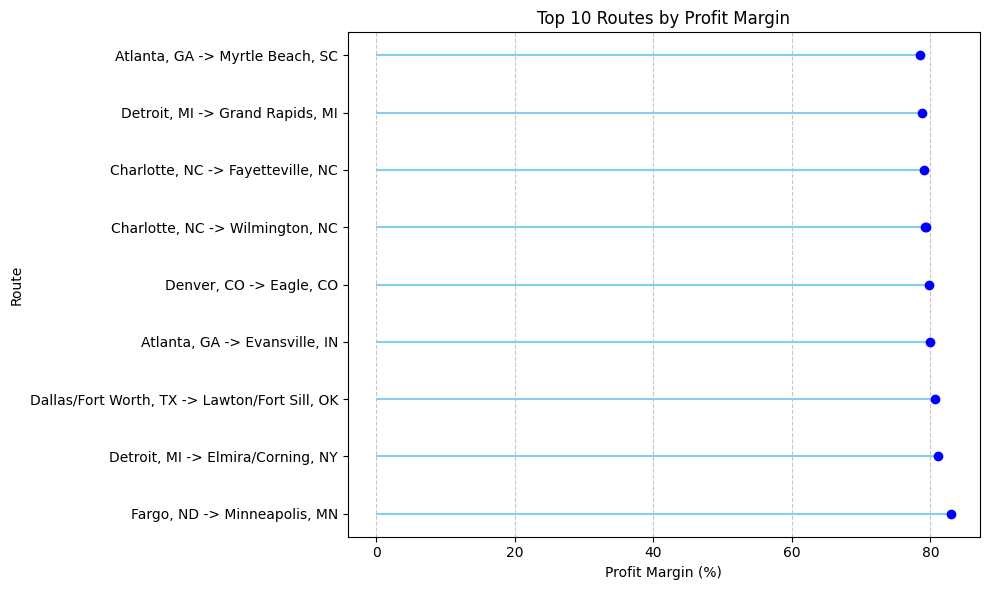

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort top 15 profitable routes by profit margin
top_margin = filtered_df.sort_values(by='PROFIT_MARGIN_PCT', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.hlines(y=top_margin['ROUTE_NAME_CITY'], xmin=0, xmax=top_margin['PROFIT_MARGIN_PCT'], color='skyblue')
plt.plot(top_margin['PROFIT_MARGIN_PCT'], top_margin['ROUTE_NAME_CITY'], "o", color='blue')

plt.xlabel('Profit Margin (%)')
plt.ylabel('Route')
plt.title('Top 10 Routes by Profit Margin')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


All top 10 routes have very high margins (~80–85%), indicating highly efficient operations.

Charlotte, Atlanta, and Detroit are recurring origin hubs — strong profitability from regional connections.

These are likely short-haul routes with low costs and high occupancy — ideal for scale-up.



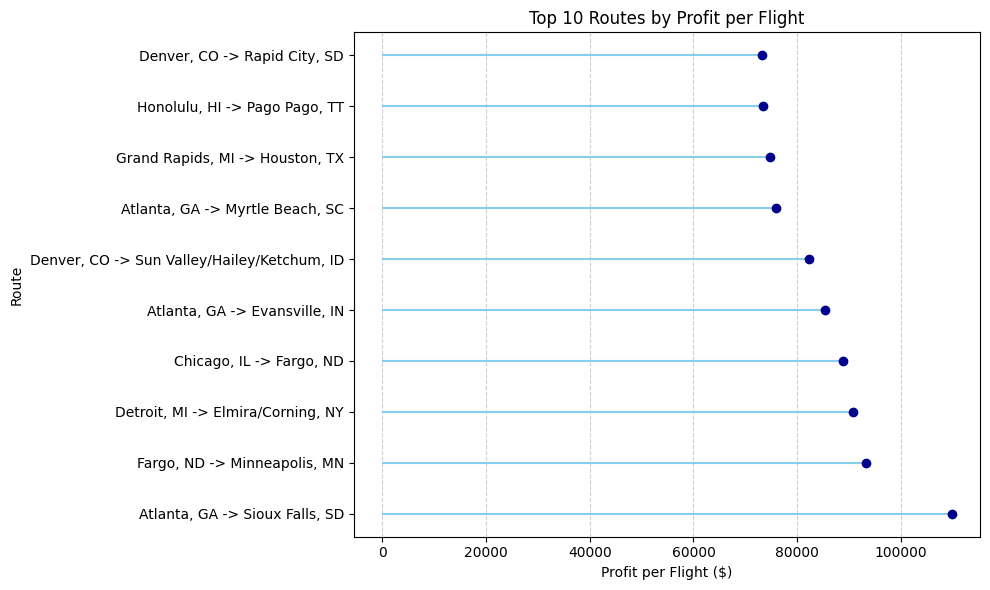

In [32]:
# Sort and select top 15 routes by profit per flight
top_profit_flight = filtered_df.sort_values(by='PROFIT_PER_FLIGHT', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.hlines(y=top_profit_flight['ROUTE_NAME_CITY'], xmin=0, xmax=top_profit_flight['PROFIT_PER_FLIGHT'], color='skyblue')
plt.plot(top_profit_flight['PROFIT_PER_FLIGHT'], top_profit_flight['ROUTE_NAME_CITY'], "o", color='darkblue')

plt.xlabel('Profit per Flight ($)')
plt.ylabel('Route')
plt.title('Top 10 Routes by Profit per Flight')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Most efficient route: Atlanta, GA -> Sioux Falls, SD tops the list with ~$110K profit per flight, suggesting extremely lean operations or high-margin fares.

Denver & Atlanta dominate the top — both cities appear multiple times, showing consistent per-flight profitability on specific niche routes.

Short-haul winners: Many routes are likely short/medium-haul with strong margins, perfect for rapid breakeven.

Consistent sweet spot: All top routes range from ~$75K to ~$110K profit per flight — great for maximizing aircraft utilization.

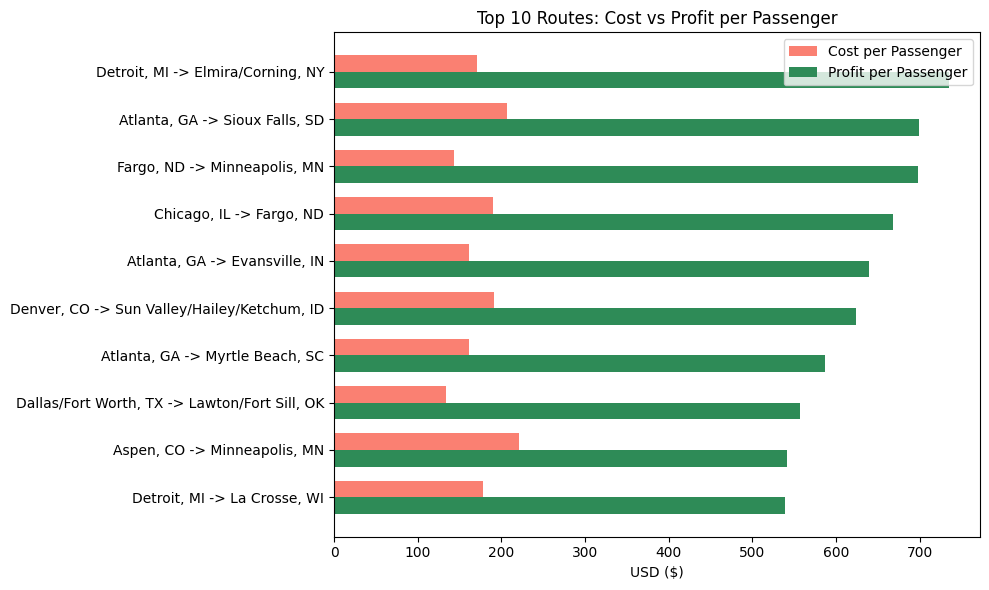

In [33]:
top_routes = filtered_df.sort_values(by='PROFIT_PER_PASSENGER', ascending=False).head(10)

y_pos = np.arange(len(top_routes))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y_pos - bar_width/2, top_routes['COST_PER_PASSENGER'], bar_width, label='Cost per Passenger', color='salmon')
ax.barh(y_pos + bar_width/2, top_routes['PROFIT_PER_PASSENGER'], bar_width, label='Profit per Passenger', color='seagreen')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_routes['ROUTE_NAME_CITY'])
ax.set_xlabel("USD ($)")
ax.set_title("Top 10 Routes: Cost vs Profit per Passenger")
ax.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


All top 10 routes show profit per passenger far exceeding cost, signaling high ROI per traveler.

Detroit → Elmira/Corning, NY leads with lowest cost (~$160) and highest profit (~$740) per passenger.

Routes like Atlanta → Sioux Falls, SD and Fargo → Minneapolis, MN also maintain very lean costs with strong returns.

Consistently low cost per passenger (~$150–$200) across most routes is a key driver of profitability.



In [34]:
import plotly.graph_objects as go

# Sort top 10 by REVENUE_PER_PASSENGER
top_routes = filtered_df.sort_values(by='REVENUE_PER_PASSENGER', ascending=False).head(10)

fig = go.Figure()

# Dumbbell lines
for i, row in top_routes.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['COST_PER_PASSENGER'], row['REVENUE_PER_PASSENGER']],
        y=[row['ROUTE_NAME_CITY'], row['ROUTE_NAME_CITY']],
        mode='lines',
        line=dict(color='lightgray', width=3),
        showlegend=False
    ))

# Left marker: Cost
fig.add_trace(go.Scatter(
    x=top_routes['COST_PER_PASSENGER'],
    y=top_routes['ROUTE_NAME_CITY'],
    mode='markers',
    name='Cost per Passenger',
    marker=dict(color='crimson', size=10, symbol='circle')
))

# Right marker: Revenue
fig.add_trace(go.Scatter(
    x=top_routes['REVENUE_PER_PASSENGER'],
    y=top_routes['ROUTE_NAME_CITY'],
    mode='markers',
    name='Revenue per Passenger',
    marker=dict(color='darkcyan', size=10, symbol='circle')
))

fig.update_layout(
    title='Top 10 Routes: Revenue vs Cost per Passenger',
    xaxis_title='USD ($)',
    yaxis_title='Route',
    height=600,
    plot_bgcolor='whitesmoke',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=False),
    font=dict(size=14)
)

fig.show()


Detroit → Elmira/Corning, NY and Atlanta → Sioux Falls, SD have the highest revenue per passenger, with low costs, showing excellent margin efficiency.

Most routes have a significant gap between cost and revenue, indicating strong pricing power and operational efficiency.

Only a few routes like Dallas → Kahului and Lihue → San Francisco show narrower profit gaps, which may warrant further cost control or fare optimization.

In [35]:
# Top 10 routes by baggage revenue percentage
top_baggage_routes = filtered_df.nlargest(10, 'BAGGAGE_REVENUE_PCT')

# Create a Treemap chart
fig = px.treemap(
    top_baggage_routes,
    path=['ROUTE_NAME_CITY'],
    values='BAGGAGE_REVENUE_PCT',
    color='BAGGAGE_REVENUE_PCT',
    color_continuous_scale='YlOrRd',
    title='Top 10 Routes by Baggage Revenue % of Total Revenue',
)
fig.update_traces(textinfo='label+value')
fig.show()


Denver, CO → Pensacola, FL shows 100% baggage revenue contribution — indicating likely data gaps or that this route only generates revenue through baggage fees.

Multiple routes like Melbourne → Philadelphia and DFW → Montrose/Delta, CO have >75% of revenue coming from baggage — potentially pointing to low fare/high-fee business models.

Myrtle Beach, SC-based routes appear frequently, suggesting baggage-heavy tourist routes.

These routes may either be underpriced on tickets or over-reliant on baggage fees, which can impact customer satisfaction.

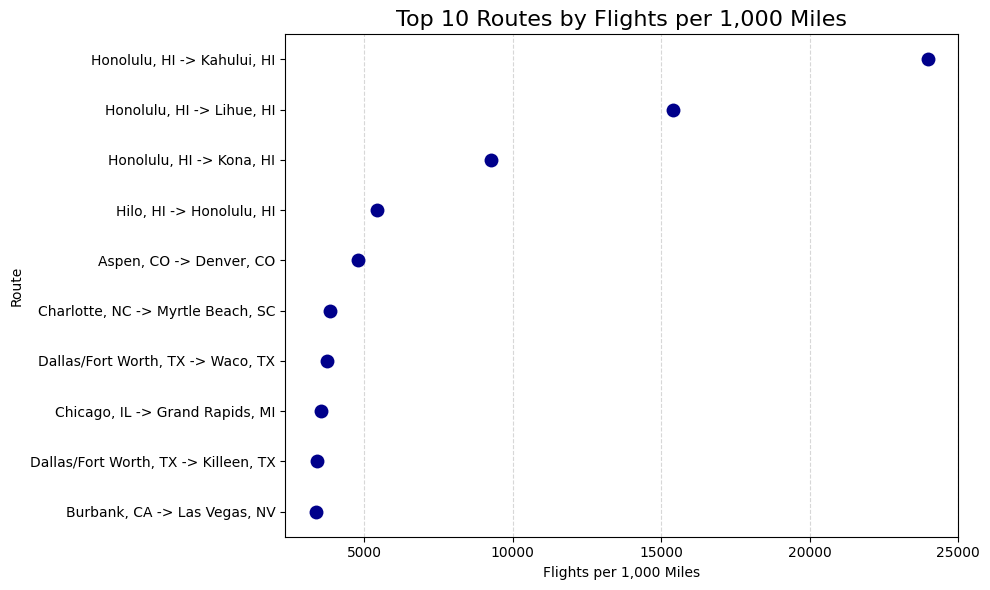

In [36]:
# Get top 10 routes with highest frequency per 1000 miles
top_routes = filtered_df.sort_values(by='FLIGHTS_PER_1000_MILES', ascending=False).head(10)

# Set up the figure
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=top_routes,
    x='FLIGHTS_PER_1000_MILES',
    y='ROUTE_NAME_CITY',
    size=10,
    color='darkblue',
    edgecolor='black'
)

plt.title('Top 10 Routes by Flights per 1,000 Miles', fontsize=16)
plt.xlabel('Flights per 1,000 Miles')
plt.ylabel('Route')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Hawaiian routes dominate: Honolulu → Kahului tops the list with exceptionally high frequency for a short distance, suggesting dense inter-island travel.

All top 4 are Hawaii-based short hauls, reflecting critical regional connectivity and operational intensity.

Aspen → Denver and Burbank → Las Vegas also show high frequency, likely due to commuter or leisure-driven traffic.

These routes may not cover much ground but generate high flight volume, implying potential for efficiency improvements or aircraft size optimization.



In [37]:
# Select top 10 profitable routes for clarity
top_routes = filtered_df.sort_values(by='PROFIT', ascending=False).head(10)

# Bubble chart
fig = px.scatter(
    top_routes,
    x='ROUND_TRIP_DISTANCE_MILES',
    y='PROFIT',
    size='ESTIMATED_PASSENGERS',
    color='PROFIT_MARGIN_PCT',
    hover_name='ROUTE',
    title='Profit vs Distance with Passenger Volume (Bubble Size)',
    labels={
        'ROUND_TRIP_DISTANCE_MILES': 'Round Trip Distance (Miles)',
        'PROFIT': 'Total Profit ($)',
        'PROFIT_MARGIN_PCT': 'Profit Margin %'
    },
    color_continuous_scale='Viridis',
    size_max=60
)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()


In [38]:
# Filter top 50 by estimated passengers for a meaningful view
top_routes = filtered_df.sort_values(by='ESTIMATED_PASSENGERS', ascending=False).head(50)

fig = px.scatter(
    top_routes,
    x="TOTAL_DELAY_MINUTES",
    y="PROFIT",
    size="ESTIMATED_PASSENGERS",
    color="AVG_DEP_DELAY_MINUTES",
    hover_name="ROUTE_NAME_CITY",
    size_max=60,
    color_continuous_scale="RdYlGn_r",
    title="Profit vs Total Delay Minutes (Bubble Size = Passengers, Color = Departure Delay)"
)

fig.update_layout(
    xaxis_title="Total Delay Minutes",
    yaxis_title="Profit ($)",
    template="plotly_white"
)

fig.show()


Most profitable routes are clustered around -5 to +2 mins total delay, showing minor delays don’t hurt profitability.

Routes with negative delays (early arrivals) tend to have larger bubbles and higher profit, highlighting operational efficiency.

Heavily delayed routes (right side, red bubbles) generally yield lower profit, even if they serve many passengers — indicating inefficiency drag.

Color shift from green (early) to red (late) clearly shows departure delays reduce profit potential.